# **Sobre o Projéto**
---



**Introdução**

Com o avanço da tecnologia e o crescimento do mercado de smartphones, escolher um dispositivo adequado pode ser uma tarefa desafiadora. A grande variedade de marcas, modelos e especificações técnicas torna essencial a análise dos fatores que influenciam o preço dos celulares.

Este projeto tem como objetivo explorar um conjunto de dados de dispositivos móveis, analisando suas características, identificando tendências e construindo um modelo de previsão de preços. Por meio de técnicas de análise exploratória de dados, visualização e aprendizado de máquina, buscamos entender quais fatores impactam diretamente o valor dos smartphones e como podemos utilizá-los para prever preços futuros.

## **Sobre o conjunto de dados**

Este conjunto de dados contém especificações detalhadas e preços oficiais de lançamento de vários modelos de celulares de diferentes empresas. Ele fornece insights sobre hardware de smartphone, tendências de preços e competitividade de marca em vários países. O conjunto de dados inclui recursos importantes como RAM, especificações da câmera, capacidade da bateria, detalhes do processador e tamanho da tela.

Um aspecto importante deste conjunto de dados são as informações de preços. Os preços registrados representam os preços oficiais de lançamento dos celulares no momento em que foram introduzidos no mercado. Os preços variam de acordo com o país e o período de lançamento, o que significa que os modelos mais antigos refletem seus preços de lançamento originais, enquanto os modelos mais novos incluem seus preços de lançamento mais recentes. Isso torna o conjunto de dados valioso para estudar tendências de preços ao longo do tempo e comparar a acessibilidade de smartphones em diferentes regiões.

**Recursos**:

* **Company Name:** a marca ou fabricante do celular.
* **Model Name:** o modelo específico do smartphone.
* **Mobile Weight:** o peso do celular (em gramas).
* **RAM:** a quantidade de memória de acesso aleatório (RAM) no dispositivo (em GB).
* **Front Camera:** a resolução da câmera frontal (selfie) (em MP).
* **Back Camera:** A resolução da câmera traseira primária (em MP).
* **Processor:** O chipset ou processador usado no dispositivo.
* **Battery Capacity:** O tamanho da bateria do smartphone (em mAh).
* **Screen Size:** O tamanho da tela do smartphone (em polegadas).
* **Launched Price:** (Paquistão, Índia, China, EUA, Dubai): O preço oficial de lançamento do celular no respectivo país no momento do seu lançamento. Os preços variam com base no ano em que o celular foi lançado.
* **Launched Year:** O ano em que o celular foi lançado oficialmente.

**Fonte:** https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025/data

# **Exploração e Limpeza de Dados**
---

In [68]:
# Importa bibliotecas
import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans

## **Carregar o dataset e visualizar as primeiras linhas.**

In [2]:
# Carrega o dataset
dados = '/content/drive/MyDrive/Aulas/Projetos/Mobiles Dataset/dados/Mobiles Dataset (2025).csv'
df = pd.read_csv(dados, encoding='unicode_escape')

In [3]:
# Prévia das primeiras 5 linhas
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


## **Verificar a existência de valores ausentes e tratá-los.**

In [4]:
# Verifica o numero de valores ausentes e duplicados
ausente = df.isna().sum().sum()
duplicado = df.duplicated().sum()
print(f'Valores ausentes: {ausente}')
print(f'Valores duplicados: {duplicado}')

Valores ausentes: 0
Valores duplicados: 15


In [5]:
# Prévia das primeiras 5 linhas dos valores duplicados
df[df.duplicated(keep=False)].head(6)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
344,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
347,Oppo,A3 128GB,186g,4GB,5MP,50MP,Snapdragon 6s 4G Gen 1,5000mAh,6.7 inches,"PKR 59,999","INR 34,999","CNY 2,999",USD 399,"AED 1,499",2024
423,Oppo,K11x 128GB,195g,8GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 59,999","INR 18,000","CNY 1,499",USD 199,"AED 1,000",2023
424,Oppo,K11x 256GB,195g,12GB,16MP,108MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.72 inches,"PKR 64,999","INR 20,000","CNY 1,699",USD 229,"AED 1,200",2023
425,Oppo,K10x 128GB,195g,6GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 54,999","INR 16,990","CNY 1,499",USD 199,"AED 1,000",2022
426,Oppo,K10x 256GB,195g,8GB,16MP,64MP + 2MP + 2MP,Qualcomm Snapdragon 695,"5,000mAh",6.59 inches,"PKR 59,999","INR 18,990","CNY 1,699",USD 229,"AED 1,200",2022


In [6]:
# Tratá os valores duplicados
df.drop_duplicates(inplace=True)
duplicado = df.duplicated().sum()
print(f'Valores duplicados: {duplicado}')

Valores duplicados: 0


## **Identificar e corrigir inconsistências nos dados.**


In [7]:
# Verificar os tipos de dados de cada coluna
print(df.dtypes)

Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object


In [8]:
# Creia uma copia do dataframe 'df'
df_tratado = df.copy()

# Renomeando as colunas
novas_colunas = ['Company Name', 'Model Name', 'Mobile Weight (g)', 'RAM (GB)',
                 'Front Camera', 'Back Camera', 'Processor',
                 'Battery Capacity (mAh)','Screen Size',
                 'Launched Price (PKR)','Launched Price (INR)',
                 'Launched Price (CNY)', 'Launched Price (USD)',
                 'Launched Price (AED)', 'Launched Year']

df_tratado.columns = novas_colunas

## **Converter tipos de dados.**

In [13]:
# Função para tratar valores extraindo números e calculando a média
def tratar_valor(value):
    numbers = re.findall(r'\d+', str(value))
    numbers = list(map(int, numbers))
    return sum(numbers) / len(numbers) if numbers else None

# Lista de colunas que devem ser tratadas com a função `tratar_valor`
colunas_para_tratar = ['Mobile Weight (g)', 'RAM (GB)', 'Battery Capacity (mAh)',
                       'Launched Price (PKR)', 'Launched Price (INR)',
                       'Launched Price (CNY)', 'Launched Price (USD)',
                       'Launched Price (AED)']

# Convertendo tipos de dados de str para int ou float
for coluna in colunas_para_tratar[:3]:
    df_tratado[coluna] = df_tratado[coluna].astype(str).str.replace(',', '').apply(tratar_valor).astype(int)
for coluna in colunas_para_tratar[3:]:
    df_tratado[coluna] = df_tratado[coluna].astype(str).str.replace(',', '').apply(tratar_valor)

In [14]:
df_tratado.head()

,Company Name,Model Name,Mobile Weight (g),RAM (GB),Front Camera,Back Camera,Processor,Battery Capacity (mAh),Screen Size,Launched Price (PKR),Launched Price (INR),Launched Price (CNY),Launched Price (USD),Launched Price (AED),Launched Year
0,Apple,iPhone 16 128GB,174,6,12MP,48MP,A17 Bionic,3600,6.1 inches,112499.5,39999.5,2899.5,399.5,1399.5,2024
1,Apple,iPhone 16 256GB,174,6,12MP,48MP,A17 Bionic,3600,6.1 inches,117499.5,42499.5,3049.5,424.5,1499.5,2024
2,Apple,iPhone 16 512GB,174,6,12MP,48MP,A17 Bionic,3600,6.1 inches,122499.5,44999.5,3249.5,449.5,1599.5,2024
3,Apple,iPhone 16 Plus 128GB,203,6,12MP,48MP,A17 Bionic,4200,6.7 inches,124999.5,44999.5,3099.5,449.5,1599.5,2024
4,Apple,iPhone 16 Plus 256GB,203,6,12MP,48MP,A17 Bionic,4200,6.7 inches,129999.5,47499.5,3249.5,474.5,1699.5,2024


In [15]:
# Verifica o numero de valores ausentes
ausente = df_tratado.isna().sum().sum()
print(f'Valores ausentes: {ausente}')

Valores ausentes: 1


In [16]:
# Remove o valor ausente
df_tratado.dropna(inplace=True)

# Verifica o numero de valores ausentes
ausente = df_tratado.isna().sum().sum()
print(f'Valores ausentes: {ausente}')

Valores ausentes: 0


In [17]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 928
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company Name            914 non-null    object 
 1   Model Name              914 non-null    object 
 2   Mobile Weight (g)       914 non-null    int64  
 3   RAM (GB)                914 non-null    int64  
 4   Front Camera            914 non-null    object 
 5   Back Camera             914 non-null    object 
 6   Processor               914 non-null    object 
 7   Battery Capacity (mAh)  914 non-null    int64  
 8   Screen Size             914 non-null    object 
 9   Launched Price (PKR)    914 non-null    float64
 10  Launched Price (INR)    914 non-null    float64
 11  Launched Price (CNY)    914 non-null    float64
 12  Launched Price (USD)    914 non-null    float64
 13  Launched Price (AED)    914 non-null    float64
 14  Launched Year           914 non-null    int64  

## **Remover outliers se ouver**

In [18]:
# Função para remover outliers
def remover_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_sem_outliers = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_sem_outliers

# Lista de colunas que devem ser tratadas com a função `remover_outliers_iqr`
colunas_numericas = ['Launched Price (USD)', 'Launched Price (PKR)', 'Launched Price (AED)',
                     'Launched Price (INR)', 'Launched Price (CNY)']

df_tratado_sem_outliers = df_tratado.copy()

for coluna in colunas_numericas:
    df_tratado_sem_outliers = remover_outliers_iqr(df_tratado_sem_outliers, coluna)

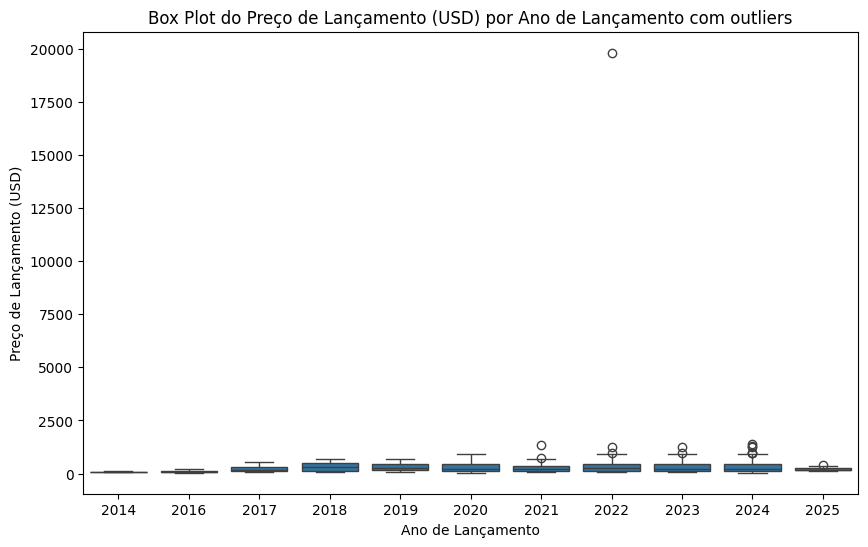

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Launched Year', y='Launched Price (USD)', data=df_tratado)
plt.title('Box Plot do Preço de Lançamento (USD) por Ano de Lançamento com outliers')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Preço de Lançamento (USD)')
plt.show()


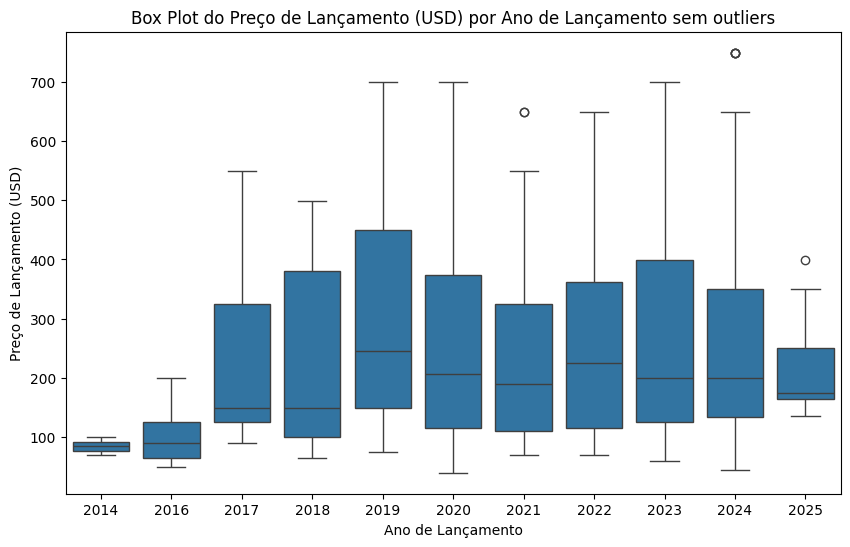

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Launched Year', y='Launched Price (USD)', data=df_tratado_sem_outliers)
plt.title('Box Plot do Preço de Lançamento (USD) por Ano de Lançamento sem outliers')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Preço de Lançamento (USD)')
plt.show()


# **Análise Exploratória**
---

## **Identificar a distribuição de preços dos celulares.**

In [23]:
# Função que cria um grafico para identificar a distribuição de preços
def plotar_histograma(df_tratado, coluna):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_tratado[coluna], bins=30, kde=True)
    plt.title(f'Distribuição de Preços - {coluna}')
    plt.xlabel('Preço')
    plt.ylabel('Frequência')
    plt.show()

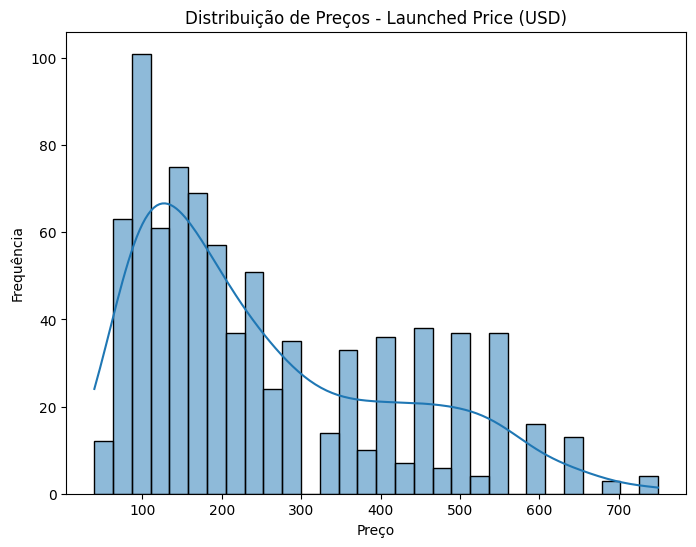

In [25]:
plotar_histograma(df_tratado_sem_outliers, 'Launched Price (USD)')
# plotar_histograma(df_tratado_sem_outliers, 'Launched Price (PKR)')
# plotar_histograma(df_tratado_sem_outliers, 'Launched Price (AED)')
# plotar_histograma(df_tratado_sem_outliers, 'Launched Price (INR)')
# plotar_histograma(df_tratado_sem_outliers, 'Launched Price (CNY)')


## **Analisar a relação entre características dos celulares (RAM, bateria) e preço.**

In [26]:
# Criar um gráfico de dispersão para visualizar a relação entre (RAM, bateria) e preço
def plotar_dispersao(df, coluna_x, coluna_y):
    plt.figure(figsize=(8, 6))

    sns.scatterplot(x=coluna_x, y=coluna_y, data=df)

    plt.title(f'Relação entre {coluna_x} e {coluna_y}')
    plt.xlabel(coluna_x)
    plt.ylabel(coluna_y)
    plt.show()

# Criar um mapa de calor para visualizar a correlação entre as variáveis
def plotar_correlacao(df):
    correlacao = df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlacao, annot=True, cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()


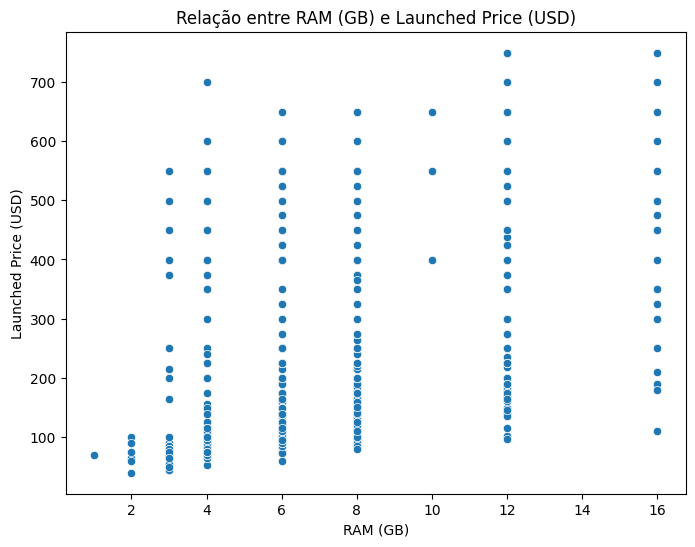

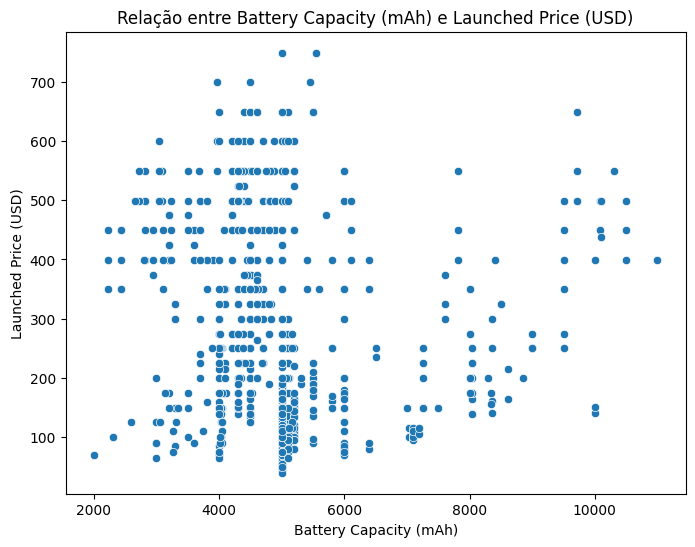

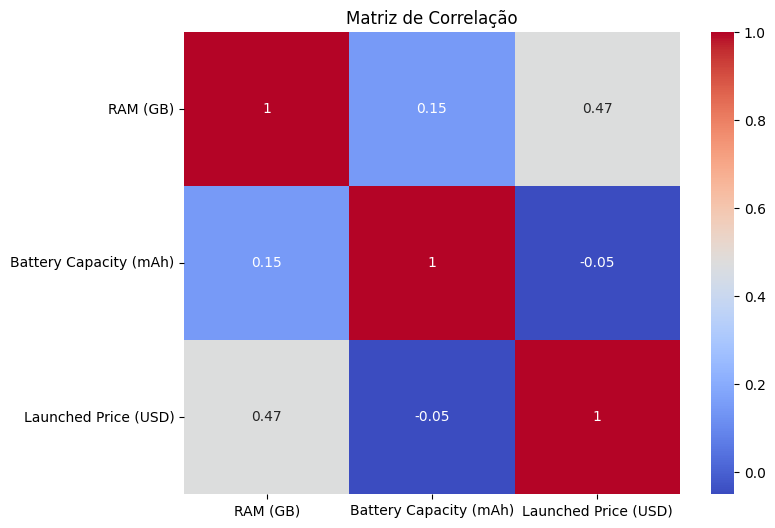

In [27]:
# Relação com os preços do USA
colunas_relacao = ['RAM (GB)', 'Battery Capacity (mAh)', 'Launched Price (USD)']
df_relacao = df_tratado_sem_outliers[colunas_relacao]

plotar_dispersao(df_relacao, 'RAM (GB)', 'Launched Price (USD)')
plotar_dispersao(df_relacao, 'Battery Capacity (mAh)', 'Launched Price (USD)')
plotar_correlacao(df_relacao)

## **Descobrir quais marcas possuem os modelos mais caros e mais baratos.**

In [28]:
# Função que cria um gráfico para analizar quais marcas possuem os modelos mais caros e mais baratos
def plotar_barras(df, coluna_x, coluna_y):
    # Criando os DataFrames
    df_preco_mean = df.groupby(coluna_x)[coluna_y].mean()
    df_preco_mean_maior = df_preco_mean.sort_values(ascending=False).head(5).reset_index()
    df_preco_mean_menor = df_preco_mean.sort_values(ascending=True).head(5).reset_index()

    plt.figure(figsize=(12, 5))

    # Primeiro gráfico (Posição 1)
    plt.subplot(1, 2, 1)
    sns.barplot(x=coluna_x, y=coluna_y, data=df_preco_mean_maior)
    plt.title(f"Marcas com a maior media de presos de celulares em {coluna_y[-5:]}")

    # Segundo gráfico (Posição 2)
    plt.subplot(1, 2, 2)
    sns.barplot(x=coluna_x, y=coluna_y, data=df_preco_mean_menor)
    plt.title(f"Marcas com a menor media de presos de celulares em {coluna_y[-5:]}")

    plt.tight_layout()

    plt.show()

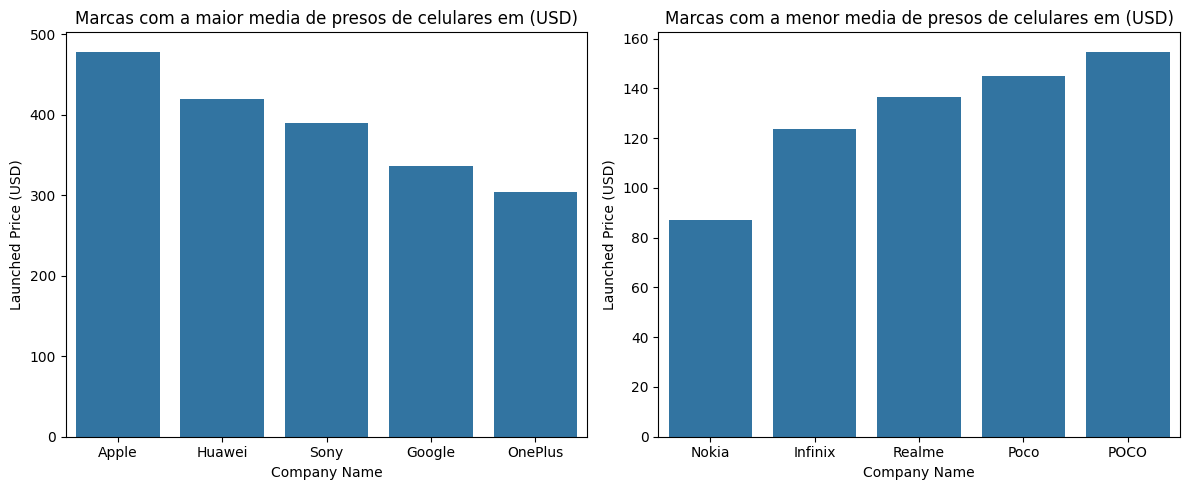

In [30]:
plotar_barras(df_tratado_sem_outliers, 'Company Name', 'Launched Price (USD)')
# plotar_barras(df_tratado_sem_outliers, 'Company Name', 'Launched Price (PKR)')
# plotar_barras(df_tratado_sem_outliers, 'Company Name', 'Launched Price (AED)')
# plotar_barras(df_tratado_sem_outliers, 'Company Name', 'Launched Price (INR)')
# plotar_barras(df_tratado_sem_outliers, 'Company Name', 'Launched Price (CNY)')

# **Modelagem e Insights**

## **Criar um modelo de regressão para prever o preço dos celulares com base em suas especificações.**

MAE: 125.98
RMSE: 161.08
R²: 0.14


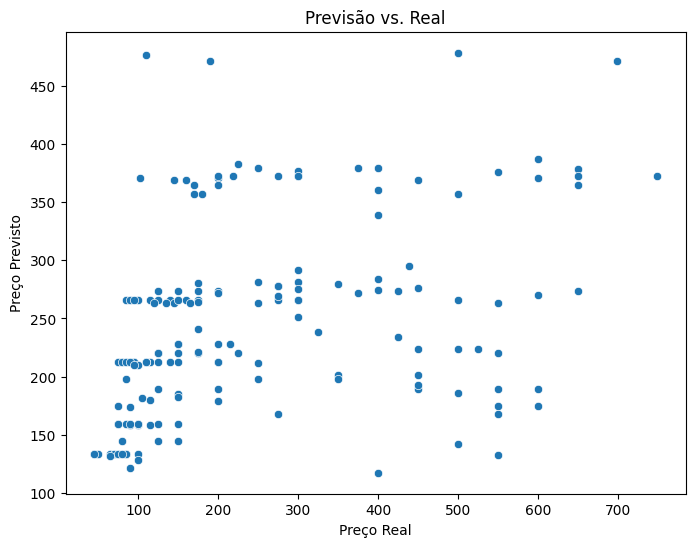

In [46]:
# Selecionar colunas relevantes
features = ['RAM (GB)', 'Battery Capacity (mAh)']
target = 'Launched Price (USD)'

# Criar novo DataFrame apenas com essas colunas
df_model = df_tratado_sem_outliers[features + [target]]

df_model = pd.get_dummies(df_model, drop_first=True)

X = df_model.drop(columns=['Launched Price (USD)'])  # Variáveis independentes
y = df_model['Launched Price (USD)']  # Variável alvo

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=557)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Erro Absoluto Médio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R² (quanto maior, melhor)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Previsão vs. Real")
plt.show()


## **Aplicar técnicas de clustering para segmentar os celulares em categorias de preço.**

In [148]:

def metodo_cotovelo(df, feature_preco='Launched Price (USD)', feature_desejada='RAM (GB)'):
    # Selecionar as features para o clustering
    features_clustering = [feature_preco, feature_desejada]
    scaler = StandardScaler()
    df_cluster = df[features_clustering]
    df_scaled = scaler.fit_transform(df_cluster)

    # Escolher o número de clusters (categorias de preço) - usar o método do cotovelo
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=557)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Método do Cotovelo')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inércia')
    plt.show()
    return df_scaled , features_clustering


def clusterizar_precos(df, df_scaled, features_clustering, n_clusters=3):
    # Aplicar KMeans com o número de clusters escolhido (exemplo: 3 clusters)
    n_clusters = n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=557)
    df['Cluster'] = kmeans.fit_predict(df_scaled)

    # Visualizar os clusters
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=features_clustering[0], y=features_clustering[1], hue='Cluster', data=df, palette='viridis')
    plt.title('Clusters de Celulares')
    plt.xlabel(features_clustering[0])
    plt.ylabel(features_clustering[1])
    plt.show()

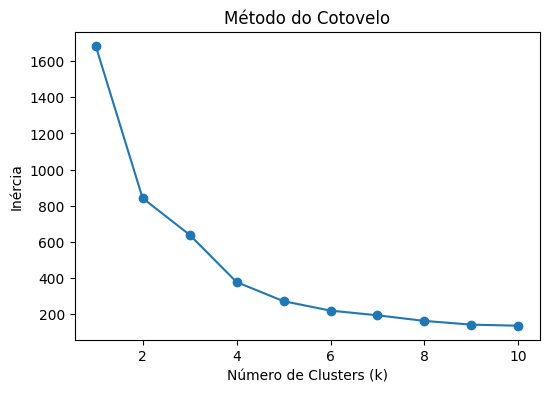

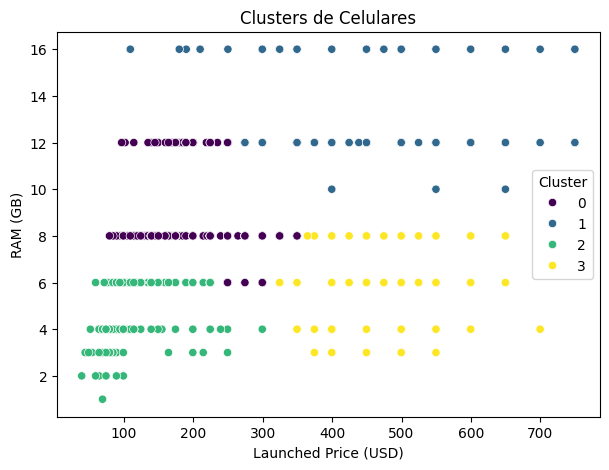

In [167]:
df_scaled, features_clustering = metodo_cotovelo(df_tratado_sem_outliers)
clusterizar_precos(df_tratado_sem_outliers, df_scaled, features_clustering, 4)

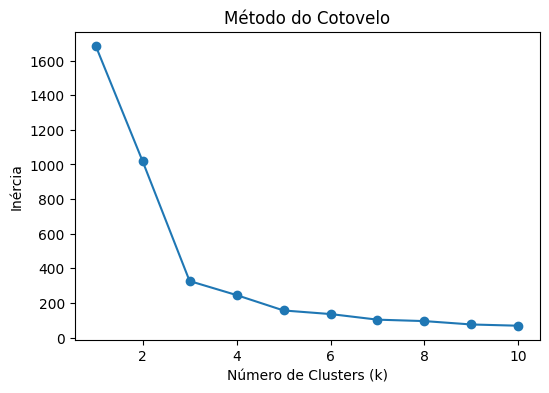

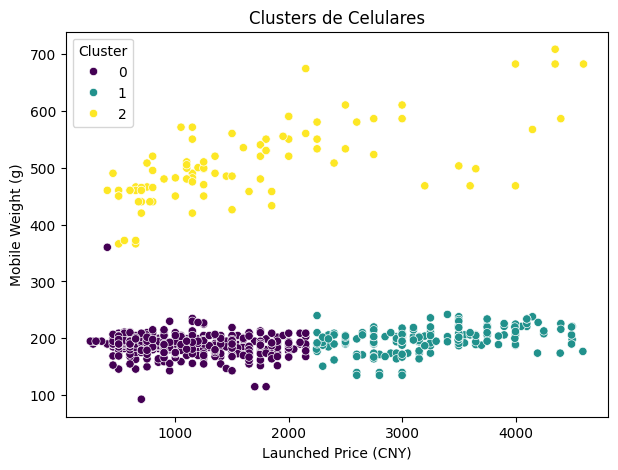

In [166]:
df_scaled, features_clustering = metodo_cotovelo(df_tratado_sem_outliers, feature_preco='Launched Price (CNY)', feature_desejada='Mobile Weight (g)')
clusterizar_precos(df_tratado_sem_outliers, df_scaled, features_clustering, 3)

## **Criar uma matriz de correlação para entender quais variáveis influenciam mais o preço.**